###  Importing Libraries

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

#rfe
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE


from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

### Data loading and viewing

In [3]:
df = pd.read_csv("Leads.csv")

In [4]:
df.shape

(9240, 37)

In [5]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Data Analysis and Cleaning

In [9]:
#Removing  Prospect ID & Lead Number as they are not necessary in analysis
df = df.drop('Prospect ID', axis=1)
df = df.drop('Lead Number', axis=1)

In [10]:
#Null check
null_col=round((df.isna().sum())/len(df.index) * 100,2)
print(null_col)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [11]:
#Print only columns that have null value
print(null_col[null_col>0])

Lead Source                                       0.39
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Tags                                             36.29
Lead Quality                                     51.59
Lead Profile                                     29.32
City                                             15.37
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Score                       45.65
dtype: float64


#### Checking and cleaning Asymmetric Index and Score

In [12]:
print(df['Asymmetrique Activity Index'].value_counts())
print(df['Asymmetrique Activity Score'].value_counts())

02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64
14.0    1771
15.0    1293
13.0     775
16.0     467
17.0     349
12.0     196
11.0      95
10.0      57
9.0        9
18.0       5
8.0        4
7.0        1
Name: Asymmetrique Activity Score, dtype: int64


In [13]:
print(df['Asymmetrique Profile Index'].value_counts())
print(df['Asymmetrique Profile Score'].value_counts())

02.Medium    2788
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64
15.0    1759
18.0    1071
16.0     599
17.0     579
20.0     308
19.0     245
14.0     226
13.0     204
12.0      22
11.0       9
Name: Asymmetrique Profile Score, dtype: int64


In [14]:
#Cleaning the Asymmetrique columns 
df['Asymmetrique Activity Index'] = df["Asymmetrique Activity Index"].fillna('').str.split(".").str[1]
df['Asymmetrique Profile Index'] = df["Asymmetrique Profile Index"].fillna('').str.split(".").str[1]
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,Select,Select,Medium,Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,Select,Select,Medium,Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,Medium,High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,Select,Mumbai,Medium,High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,Select,Mumbai,Medium,High,15.0,18.0,No,No,Modified


<AxesSubplot:xlabel='Asymmetrique Profile Score', ylabel='count'>

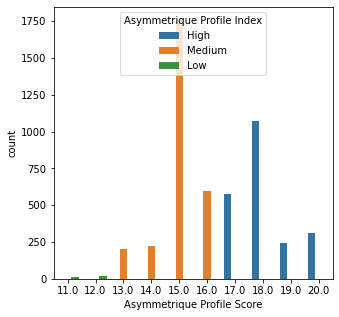

In [15]:
#Relation between index and scores
plt.figure(figsize = (5,5))
sns.countplot(x = 'Asymmetrique Profile Score', hue ='Asymmetrique Profile Index',data = df,  hue_order=['High','Medium','Low'])

<AxesSubplot:xlabel='Asymmetrique Activity Score', ylabel='count'>

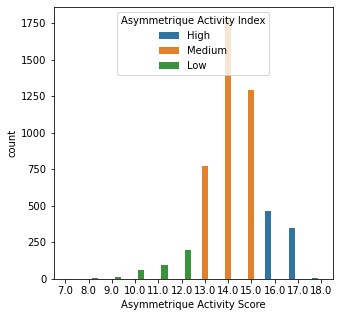

In [16]:
plt.figure(figsize = (5,5))
sns.countplot(x = 'Asymmetrique Activity Score', hue ='Asymmetrique Activity Index',data = df,  hue_order=['High','Medium','Low'])

#### Lead with Score from 7 to 12 fall in the category of Low.
#### Lead with Score of 13,14 & 15 fall in the category of Medium.
#### Lead with Score of 16,17 & 18 fall in the category of High.

In [18]:
#Since index explains it well we can drop the score columns.
cols = ['Asymmetrique Activity Score','Asymmetrique Profile Score']
df.drop(cols, axis = 1, inplace = True)

KeyError: "['Asymmetrique Activity Score' 'Asymmetrique Profile Score'] not found in axis"

In [19]:
#Find not needed columns and drop them.
# Check the unique counts for all columns across the data set
cols = []
for i in df.columns:
    if df[i].nunique() ==1:
        cols.append(i)
print(cols)

['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']


In [20]:
df.drop(cols, axis =1,inplace = True)
df.shape

(9240, 28)

In [21]:
#From the dataset and problem statement we are aware that SELECT is null.
#find columns having Select and impute them
df.columns[df.isin(['Select']).any()]

Index(['Specialization', 'How did you hear about X Education', 'Lead Profile',
       'City'],
      dtype='object')

In [22]:
df['Specialization'] = df['Specialization'].replace('Select', np.nan)
df['How did you hear about X Education'] = df['How did you hear about X Education'].replace('Select',np.nan)
df['Lead Profile']= df['Lead Profile'].replace('Select',np.nan)
df['City']= df['City'].replace('Select',np.nan)

In [23]:
null_col=round((df.isna().sum())/len(df.index) * 100,2).sort_values(ascending = False)
print(null_col[null_col>0])

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
dtype: float64


In [24]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,No,Interested in other courses,Low in Relevance,NaN,NaN,Medium,Medium,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,Ringing,NaN,NaN,NaN,Medium,Medium,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,Will revert after reading the email,Might be,Potential Lead,Mumbai,Medium,High,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,Ringing,Not Sure,NaN,Mumbai,Medium,High,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,Will revert after reading the email,Might be,NaN,Mumbai,Medium,High,No,Modified


In [25]:
df.shape

(9240, 28)

In [26]:
#Dropping the columns which have more than 40% missing values
df.drop(df.loc[:,list(round((df.isnull().sum()/len(df.index)*100),2)>40)].columns,axis =1, inplace = True)

In [27]:
df.shape

(9240, 23)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'India'),
  Text(1, 0, 'Russia'),
  Text(2, 0, 'Kuwait'),
  Text(3, 0, 'Oman'),
  Text(4, 0, 'United Arab Emirates'),
  Text(5, 0, 'United States'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'United Kingdom'),
  Text(8, 0, 'Bahrain'),
  Text(9, 0, 'Ghana'),
  Text(10, 0, 'Singapore'),
  Text(11, 0, 'Qatar'),
  Text(12, 0, 'Saudi Arabia'),
  Text(13, 0, 'Belgium'),
  Text(14, 0, 'France'),
  Text(15, 0, 'Sri Lanka'),
  Text(16, 0, 'China'),
  Text(17, 0, 'Canada'),
  Text(18, 0, 'Netherlands'),
  Text(19, 0, 'Sweden'),
  Text(20, 0, 'Nigeria'),
  Text(21, 0, 'Hong Kong'),
  Text(22, 0, 'Germany'),
  Text(23, 0, 'Asia/Pacific Region'),
  Text(24, 0, 'Uganda'),
  Text(25, 0, 'Kenya'),
  Text(26, 0, 'Italy'),
  Text(27, 0, 'South Africa'),
  Text(28, 0, 'Tanzania'),
  Text(29, 0, 'unknown'),
  Text(30, 0

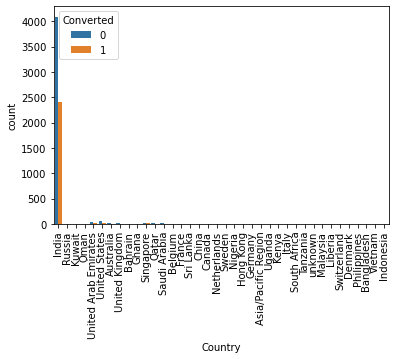

In [29]:
sns.countplot(x= 'Country', hue = 'Converted', data = df)
plt.xticks(rotation=90)

In [402]:
df['Country'].value_counts(dropna = False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [30]:
#the country column has no influence on conversion rate as most of the countries have insignificant values.
df=df.drop('Country',axis=1)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Thane & Outskirts'),
  Text(2, 0, 'Other Metro Cities'),
  Text(3, 0, 'Other Cities'),
  Text(4, 0, 'Other Cities of Maharashtra'),
  Text(5, 0, 'Tier II Cities')])

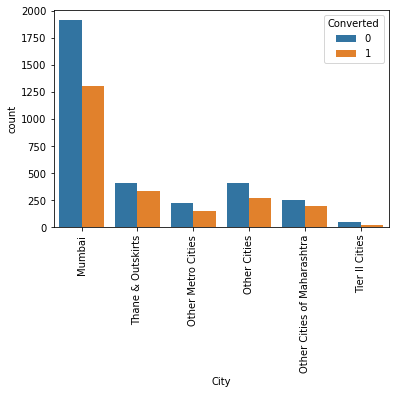

In [31]:
sns.countplot(x= 'City', hue = 'Converted', data = df)
plt.xticks(rotation=90)

In [32]:
df['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [33]:
# for city we can observe a propotional relation between our target column , hence we can impute it using mode.

df['City'].fillna(df.City.mode()[0],inplace = True)

In [34]:
df['City'].value_counts(dropna=False)

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [35]:
#finding nulls
null_col=round((df.isna().sum())/len(df.index) * 100,2).sort_values(ascending = False)
print(null_col[null_col>0])

Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
dtype: float64


In [36]:
#specialization
df['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Business Administration'),
  Text(1, 0, 'Media and Advertising'),
  Text(2, 0, 'Supply Chain Management'),
  Text(3, 0, 'IT Projects Management'),
  Text(4, 0, 'Finance Management'),
  Text(5, 0, 'Travel and Tourism'),
  Text(6, 0, 'Human Resource Management'),
  Text(7, 0, 'Marketing Management'),
  Text(8, 0, 'Banking, Investment And Insurance'),
  Text(9, 0, 'International Business'),
  Text(10, 0, 'E-COMMERCE'),
  Text(11, 0, 'Operations Management'),
  Text(12, 0, 'Retail Management'),
  Text(13, 0, 'Services Excellence'),
  Text(14, 0, 'Hospitality Management'),
  Text(15, 0, 'Rural and Agribusiness'),
  Text(16, 0, 'Healthcare Management'),
  Text(17, 0, 'E-Business')])

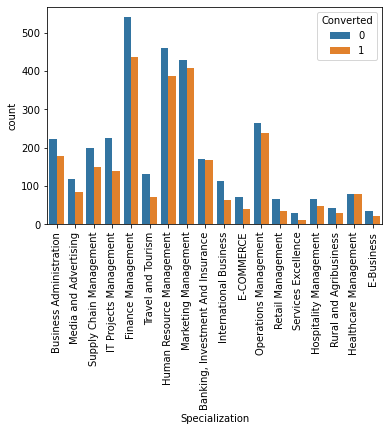

In [37]:
sns.countplot(x= 'Specialization', hue = 'Converted', data = df)
plt.xticks(rotation=90)

In [38]:
#since we can observe that few specialization has very high or almost equal conversion
# so we can have the null as an seperate category as others
df['Specialization'] = df['Specialization'].replace(np.nan,'Others')

In [39]:
#Tags
df['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'In confusion whether part time or DLP'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'in touch with EINS'),
  Text(8, 0, 'Already a student'),
  Text(9, 0, 'Diploma holder (Not Eligible)'),
  Text(10, 0, 'Graduation in progress'),
  Text(11, 0, 'Closed by Horizzon'),
  Text(12, 0, 'number not provided'),
  Text(13, 0, 'opp hangup'),
  Text(14, 0, 'Not doing further education'),
  Text(15, 0, 'invalid number'),
  Text(16, 0, 'wrong number given'),
  Text(17, 0, 'Interested  in full time MBA'),
  Text(18, 0, 'Still Thinking'),
  Text(19, 0, 'Lost to Others'),
  Text(20, 0, 'Shall take in the next coming month'),
  Text(21, 0, 'Lateral student'),
  Text(22, 0, 'Interested in Next batc

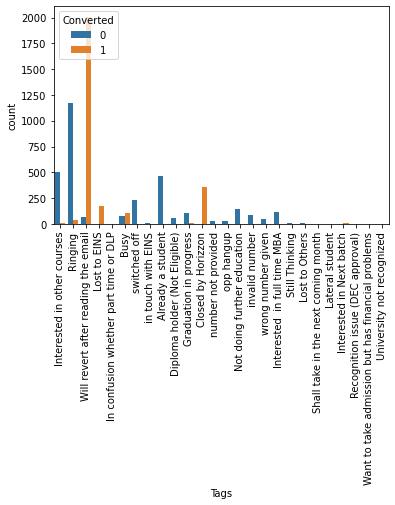

In [40]:
sns.countplot(x= 'Tags', hue = 'Converted', data = df)
plt.xticks(rotation=90)

In [41]:
#Tags indicate the current status of each lead 
# by analyzing the tags we can find almost every reason so we can consider the null values in tags to be other reason that is not specified/personal

In [42]:
df['Tags'] = df['Tags'].replace(np.nan,'Others')

In [43]:
#What matters most to you in choosing a course
df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [44]:
#from the value distribution and this is an educational course we can assume the null values to be for better career prospect
df['What matters most to you in choosing a course'].fillna(df['What matters most to you in choosing a course'].mode()[0],inplace = True)

In [45]:
#What is your current occupation
df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

Text(0.5, 0, '')

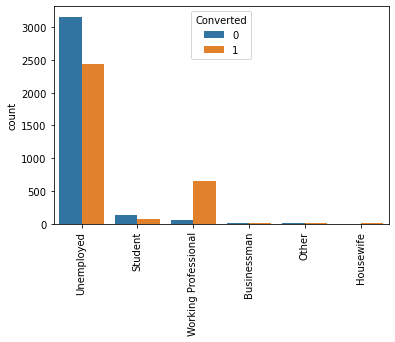

In [46]:
sns.countplot(x='What is your current occupation', hue = 'Converted', data = df)
plt.xticks(rotation=90)
plt.xlabel(None)

In [47]:
#since we cannot assume the occupation of the lead we can add the nulls to the other category.
df['What is your current occupation'].fillna(('Other'), inplace=True)

In [48]:
df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
Other                   2706
Working Professional     706
Student                  210
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [49]:
#finding nulls
null_col=round((df.isna().sum())/len(df.index) * 100,2).sort_values(ascending = False)
print(null_col[null_col>0])

TotalVisits             1.48
Page Views Per Visit    1.48
Last Activity           1.11
Lead Source             0.39
dtype: float64


In [50]:
df.shape

(9240, 22)

In [51]:
#We choose to drop these rows as they are very less nearly 2%
df.dropna(inplace = True)

In [52]:
df.shape

(9074, 22)

In [53]:
#Checking nulls
round(100*(df.isnull().sum()/len(df.index)),2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                          0.0
Tags                                          

### All the null data is cleaned / dropped /imputed sucessfully

### View the update dataset

In [54]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Others,...,No,No,No,No,No,No,Interested in other courses,Mumbai,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Others,...,No,No,No,No,No,No,Ringing,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,...,No,No,No,No,No,No,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,...,No,No,No,No,No,No,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Others,...,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Modified


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Specialization                                 9074 

In [56]:
#Find the yes or no categorical columns and remove columns that are single valued.
print(df['Do Not Email'].value_counts())
print(df['Do Not Call'].value_counts())
print(df['Search'].value_counts())
print(df['Newspaper Article'].value_counts())
print(df['X Education Forums'].value_counts())
print(df['Newspaper'].value_counts())
print(df['Digital Advertisement'].value_counts())
print(df['Through Recommendations'].value_counts())
print(df['A free copy of Mastering The Interview'].value_counts())

No     8358
Yes     716
Name: Do Not Email, dtype: int64
No     9072
Yes       2
Name: Do Not Call, dtype: int64
No     9060
Yes      14
Name: Search, dtype: int64
No     9072
Yes       2
Name: Newspaper Article, dtype: int64
No     9073
Yes       1
Name: X Education Forums, dtype: int64
No     9073
Yes       1
Name: Newspaper, dtype: int64
No     9070
Yes       4
Name: Digital Advertisement, dtype: int64
No     9067
Yes       7
Name: Through Recommendations, dtype: int64
No     6186
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64


In [57]:
#Dropping the columns that are single valued and no proper insights can be derived
df=df.drop('Do Not Call',axis=1)
df=df.drop('Search',axis=1)
df=df.drop('Newspaper Article',axis=1)
df=df.drop('X Education Forums',axis=1)
df=df.drop('Newspaper',axis=1)
df=df.drop('Digital Advertisement',axis=1)
df=df.drop('Through Recommendations',axis=1)

In [58]:
df.shape

(9074, 15)

## Data Visuvalization and Outlier analysis

In [60]:
#Distribution of numerical columns

<AxesSubplot:xlabel='TotalVisits', ylabel='Density'>

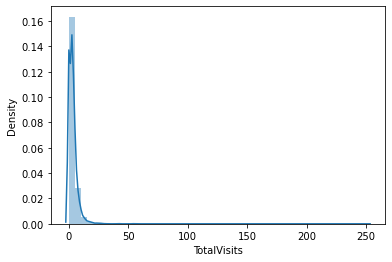

In [61]:
sns.distplot(df['TotalVisits'])

<AxesSubplot:xlabel='Total Time Spent on Website', ylabel='Density'>

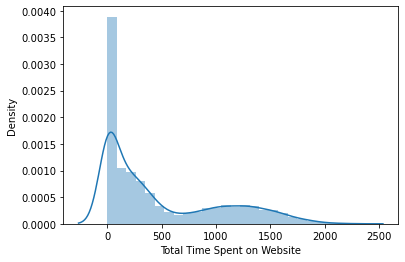

In [62]:
sns.distplot(df['Total Time Spent on Website'])

<AxesSubplot:xlabel='Page Views Per Visit', ylabel='Density'>

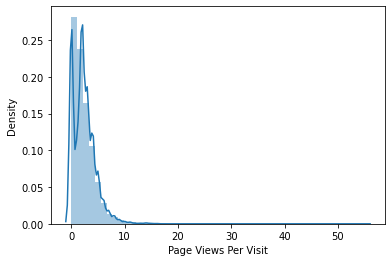

In [63]:
sns.distplot(df['Page Views Per Visit'])

#### The data distribution is skewed

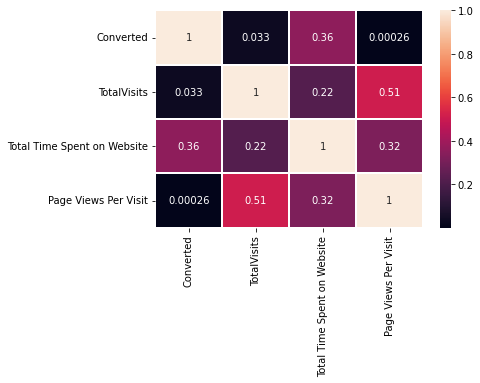

In [64]:
# Observing Correlation
# heatmap
sns.heatmap(df.corr(), annot=True, linewidth=0.1 )
plt.show()

#### The columns are not highly correlated with each other columns

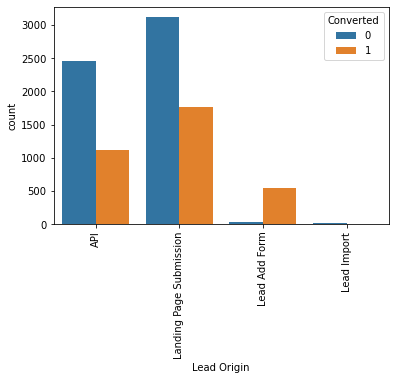

<Figure size 720x360 with 0 Axes>

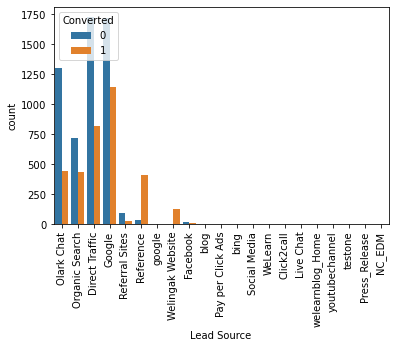

<Figure size 720x360 with 0 Axes>

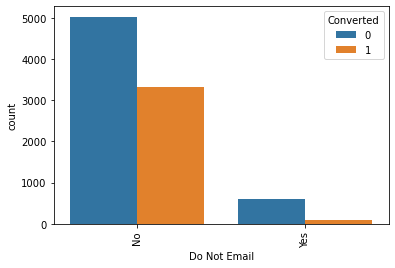

<Figure size 720x360 with 0 Axes>

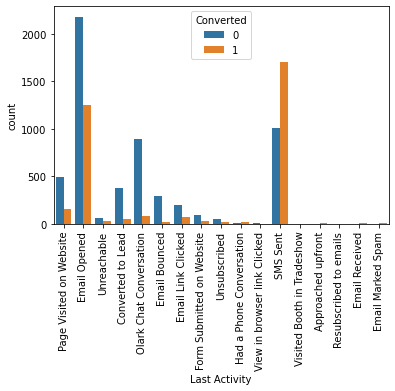

<Figure size 720x360 with 0 Axes>

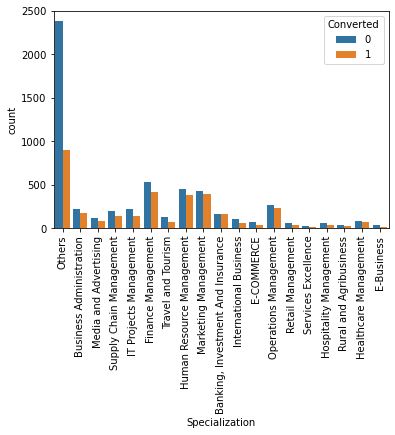

<Figure size 720x360 with 0 Axes>

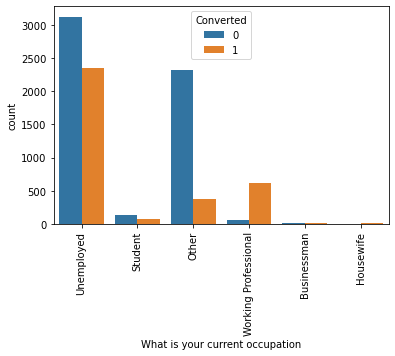

<Figure size 720x360 with 0 Axes>

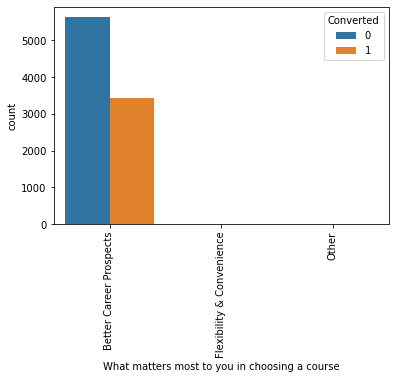

<Figure size 720x360 with 0 Axes>

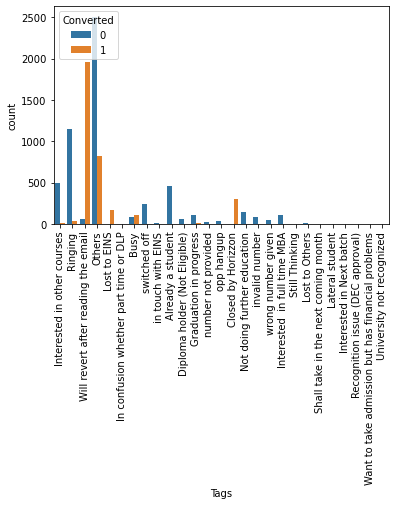

<Figure size 720x360 with 0 Axes>

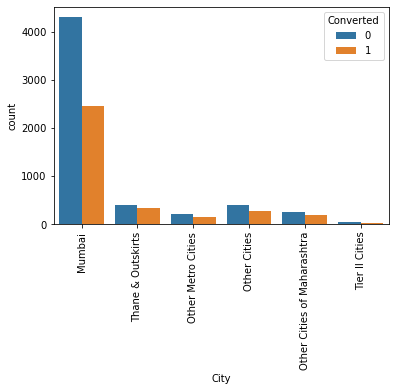

<Figure size 720x360 with 0 Axes>

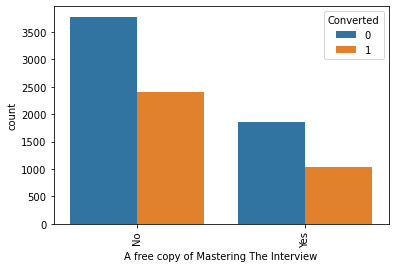

<Figure size 720x360 with 0 Axes>

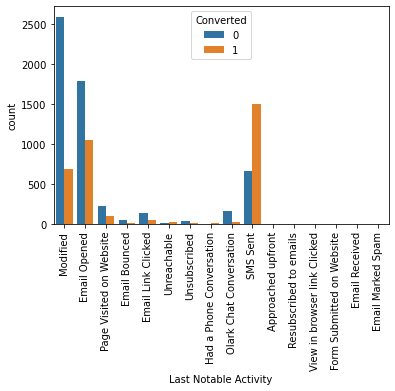

<Figure size 720x360 with 0 Axes>

In [65]:
# Visualizing Categorical Variable
catVar = df.select_dtypes(include ="object").columns
for x in catVar:
    sns.countplot(df[x], hue=df.Converted)
    plt.xticks(rotation = 90)
    plt.figure(figsize =(10,5))
    plt.show()

### Inference from the plots :

#### 1. Lead Origin with API & Landing Page Submission has higher conversion rate
#### 2. Lead Sources: Google, Direct Traffic, Olark Chat & reference have higher conversion rate
#### 3. Coverted leads has last activity as Email opened & SMS sent
#### 4. Leads Prefer specialization as: Marketing, HR, Operation & Finance Management
#### 5. Converted leads are majority unemployed
#### 6. Leads choose cources for better career prospects
#### 7. Popular Tags of converted leads: Will revert after reading the email

<AxesSubplot:xlabel='TotalVisits'>

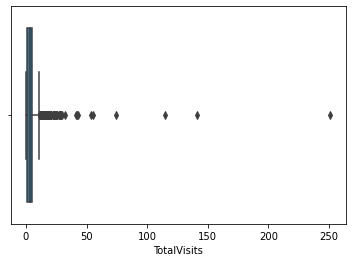

In [66]:
sns.boxplot(x = 'TotalVisits', data = df)

<AxesSubplot:xlabel='Total Time Spent on Website'>

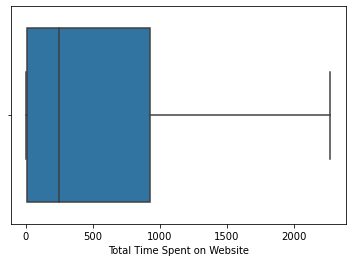

In [67]:
sns.boxplot(x = 'Total Time Spent on Website', data = df)

<AxesSubplot:xlabel='Page Views Per Visit'>

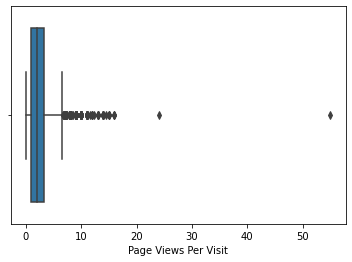

In [68]:
sns.boxplot(x = 'Page Views Per Visit', data = df)

In [69]:
# Removing outliers using the IQR
Q1 = df['TotalVisits'].quantile(0.01)
Q3 = df['TotalVisits'].quantile(0.99)
df = df.loc[(df['TotalVisits'] >= Q1) & (df['TotalVisits'] <= Q3)]

Q1 = df['Page Views Per Visit'].quantile(0.01)
Q3 = df['Page Views Per Visit'].quantile(0.99)
df=df.loc[(df['Page Views Per Visit'] >= Q1) & (df['Page Views Per Visit'] <= Q3)]

<AxesSubplot:xlabel='Page Views Per Visit'>

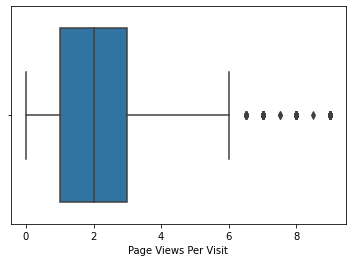

In [70]:
sns.boxplot(x = 'Page Views Per Visit', data = df)

<AxesSubplot:xlabel='TotalVisits'>

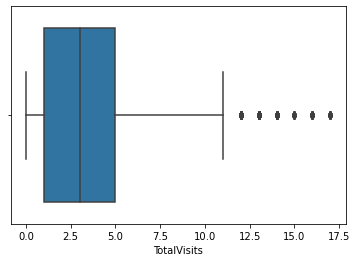

In [71]:
sns.boxplot(x = 'TotalVisits', data = df)

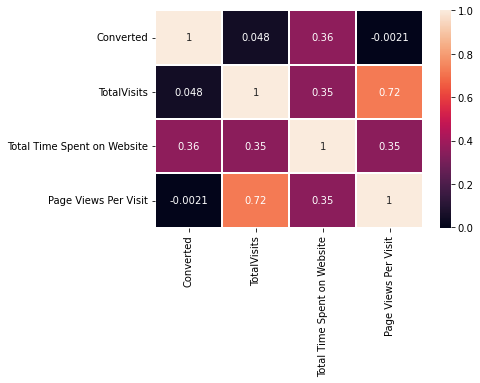

In [72]:
sns.heatmap(df.corr(), annot=True, linewidth=0.1 )
plt.show()

#### TotalVisits and Page Views Per Visit have high correlation of 0.75

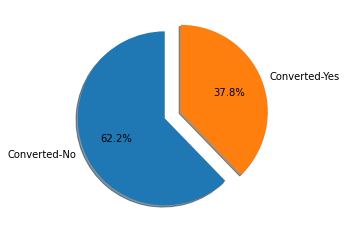

In [73]:
#Distribution of Target variable -> visuvalization 
explode = (0.1, 0.1) 
labels = ['Converted-No', 'Converted-Yes']
size = df['Converted'].value_counts()/len(df.index) * 100
plt.pie(size, labels=labels, explode = explode, autopct='%1.1f%%',shadow=True, startangle=90)
plt.show()

In [74]:
df.shape

(8924, 15)

## Data Preparation for Model building

In [75]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Better Career Prospects,Interested in other courses,Mumbai,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,Better Career Prospects,Ringing,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Better Career Prospects,Will revert after reading the email,Mumbai,No,Modified


In [76]:
#Find the yes or no categorical column and create dummy

In [77]:
print(df['Do Not Email'].value_counts())

No     8235
Yes     689
Name: Do Not Email, dtype: int64


In [78]:
#'Do Not Email'
dummy_df = pd.get_dummies(df['Do Not Email'],prefix='Do Not Email')
df = pd.concat([df,dummy_df], axis=1)

# Dropping the "Yes" entries as they are less in number
df.drop(['Do Not Email','Do Not Email'+'_Yes'], axis =1 , inplace=True)

In [79]:
#'A free copy of Mastering The Interview'
dummy_df = pd.get_dummies(df['A free copy of Mastering The Interview'],prefix='A free copy of Mastering The Interview')
df = pd.concat([df,dummy_df], axis=1)

# Dropping the "Yes" entries as they are less in number
df.drop(['A free copy of Mastering The Interview','A free copy of Mastering The Interview'+'_Yes'], axis =1 , inplace=True)

In [80]:
df.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Tags,City,Last Notable Activity,Do Not Email_No,A free copy of Mastering The Interview_No
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Better Career Prospects,Interested in other courses,Mumbai,Modified,1,1
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Others,Unemployed,Better Career Prospects,Ringing,Mumbai,Email Opened,1,1
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,Will revert after reading the email,Mumbai,Email Opened,1,0
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,Ringing,Mumbai,Modified,1,1
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Better Career Prospects,Will revert after reading the email,Mumbai,Modified,1,1


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8924 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    8924 non-null   object 
 1   Lead Source                                    8924 non-null   object 
 2   Converted                                      8924 non-null   int64  
 3   TotalVisits                                    8924 non-null   float64
 4   Total Time Spent on Website                    8924 non-null   int64  
 5   Page Views Per Visit                           8924 non-null   float64
 6   Last Activity                                  8924 non-null   object 
 7   Specialization                                 8924 non-null   object 
 8   What is your current occupation                8924 non-null   object 
 9   What matters most to you in choosing a course  8924 

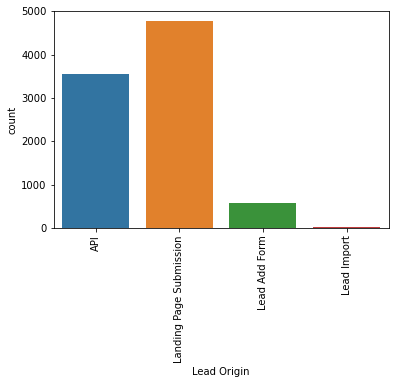

<Figure size 720x360 with 0 Axes>

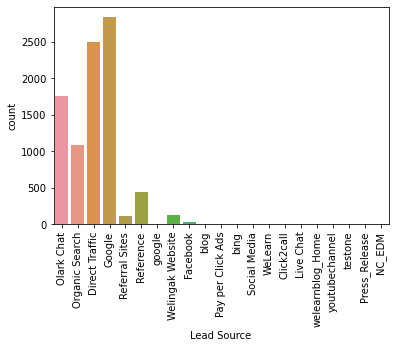

<Figure size 720x360 with 0 Axes>

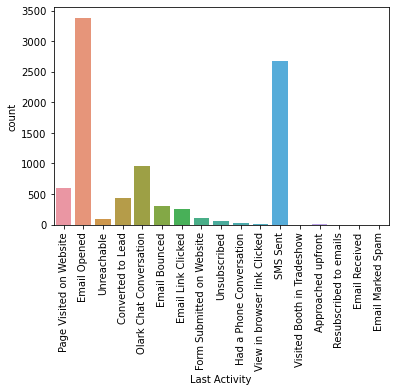

<Figure size 720x360 with 0 Axes>

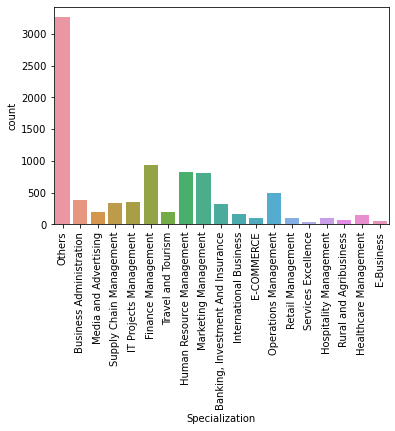

<Figure size 720x360 with 0 Axes>

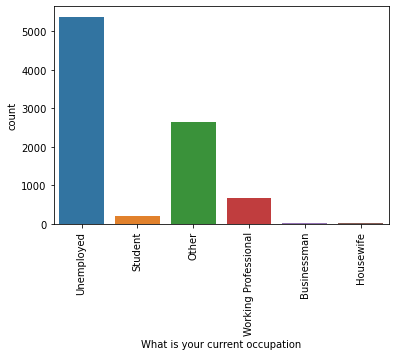

<Figure size 720x360 with 0 Axes>

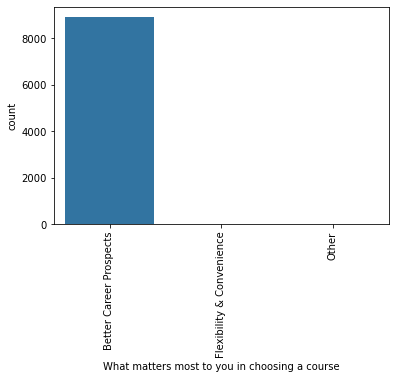

<Figure size 720x360 with 0 Axes>

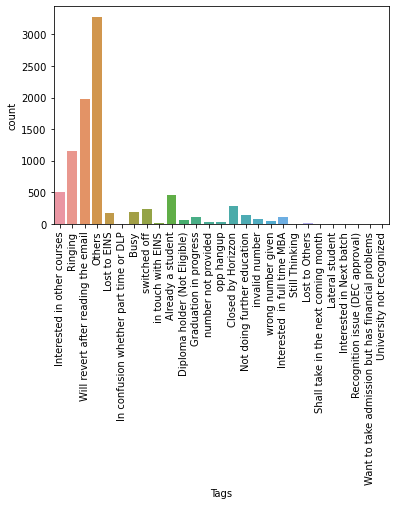

<Figure size 720x360 with 0 Axes>

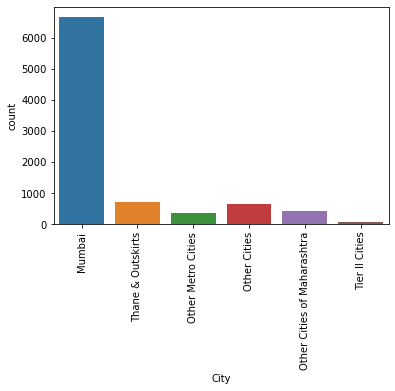

<Figure size 720x360 with 0 Axes>

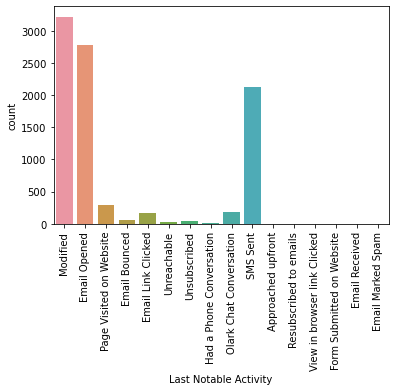

<Figure size 720x360 with 0 Axes>

In [82]:
catVar = df.select_dtypes(include ="object").columns
for x in catVar:
    sns.countplot(df[x], data=df)
    plt.xticks(rotation = 90)
    plt.figure(figsize =(10,5))
    plt.show()

#### Analyzing the value distribution in categorical variable/ columns and merging columns of smaller significance and creating a dummy .

In [83]:
for x,row in df.iterrows():
    if df.at[x,'Lead Origin']== 'Quick Add Form':
        df.at[x,'Lead Origin'] = 'Others'
    
    if df.at[x,'Lead Source']== 'google':
        df.at[x,'Lead Source'] = 'Google'
    elif df.at[x,'Lead Source'] in (['blog','Pay per Click Ads','bing','Social Media','WeLearn','Click2call','Live Chat','welearnblog_Home','testone','Press_Release','NC_EDM']):
        df.at[x,'Lead Source'] = 'Others'
    
    if df.at[x,'Last Activity'] in (['Had a Phone Conversation','Approached upfront','View in browser link Clicked','Email Marked Spam','Email Received','Visited Booth in Tradeshow']):
        df.at[x,'Last Activity'] = 'Others'
    
    if df.at[x,'Last Notable Activity'] in (['Unreachable','Had a Phone Conversation','Email Marked Spam','Approached upfront','View in browser link Clicked','Email Received','Form Submitted on Website']):
        df.at[x,'Last Notable Activity'] = 'Others'
    
    if df.at[x,'Tags'] in (['wrong number given','opp hangup','number not provided','in touch with EINS','Lost to Others','Want to take admission but has financial problems','Still Thinking','Interested in Next batch','In confusion whether part time or DLP','Lateral student','University not recognized','Shall take in the next coming month','Recognition issue (DEC approval)']):
        df.at[x,'Tags'] = 'Others'

In [84]:
catVar = df.select_dtypes(include ="object").columns
for x in catVar:
    print(df[x].value_counts())

Landing Page Submission    4768
API                        3546
Lead Add Form               580
Lead Import                  30
Name: Lead Origin, dtype: int64
Google              2841
Direct Traffic      2499
Olark Chat          1751
Organic Search      1092
Reference            442
Welingak Website     129
Referral Sites       117
Facebook              31
Others                21
youtubechannel         1
Name: Lead Source, dtype: int64
Email Opened                 3385
SMS Sent                     2678
Olark Chat Conversation       966
Page Visited on Website       594
Converted to Lead             428
Email Bounced                 310
Email Link Clicked            264
Form Submitted on Website     114
Unreachable                    88
Unsubscribed                   58
Others                         38
Resubscribed to emails          1
Name: Last Activity, dtype: int64
Others                               3262
Finance Management                    942
Human Resource Management       

In [85]:
for x in catVar:
    print(x)

Lead Origin
Lead Source
Last Activity
Specialization
What is your current occupation
What matters most to you in choosing a course
Tags
City
Last Notable Activity


In [86]:
#Create the dummy variables and drop the "Others" values
obj_lst=['Lead Origin','Lead Source','Last Activity','What matters most to you in choosing a course','Last Notable Activity','City']

for obj in obj_lst:
    # Creating dummy variables for category variables
    dummy_df = pd.get_dummies(df[obj],prefix=obj)
    df = pd.concat([df,dummy_df], axis=1)
    if obj+'_Others' in df:
        df.drop([obj,obj+'_Others'], axis =1 , inplace=True)
    elif obj+'_Other' in df:
        df.drop([obj,obj+'_Other'], axis =1 , inplace=True)
    else:
        df.drop([obj], axis =1 , inplace=True)

In [87]:
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,Tags,Do Not Email_No,A free copy of Mastering The Interview_No,Lead Origin_API,...,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0.0,0,0.0,Others,Unemployed,Interested in other courses,1,1,1,...,0,0,0,0,1,0,0,0,0,0
1,0,5.0,674,2.5,Others,Unemployed,Ringing,1,1,1,...,0,0,0,0,1,0,0,0,0,0
2,1,2.0,1532,2.0,Business Administration,Student,Will revert after reading the email,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1.0,305,1.0,Media and Advertising,Unemployed,Ringing,1,1,0,...,0,0,0,0,1,0,0,0,0,0
4,1,2.0,1428,1.0,Others,Unemployed,Will revert after reading the email,1,1,0,...,0,0,0,0,1,0,0,0,0,0


In [88]:
obj_lst=['Specialization','What is your current occupation','Tags']

for obj in obj_lst:
    # Creating dummy variables for category variables
    dummy_df = pd.get_dummies(df[obj],prefix=obj)
    df = pd.concat([df,dummy_df], axis=1)
    if obj+'_Others' in df:
        df.drop([obj,obj+'_Others'], axis =1 , inplace=True)
    elif obj+'_Other' in df:
        df.drop([obj,obj+'_Other'], axis =1 , inplace=True)
    else:
        df.drop([obj], axis =1 , inplace=True)

In [89]:
#df.head()
df.shape

(8924, 83)

## Test and Train Split

In [91]:
X=df.drop(['Converted'], axis =1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Do Not Email_No,A free copy of Mastering The Interview_No,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off
0,0.0,0,0.0,1,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,5.0,674,2.5,1,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,1.0,305,1.0,1,1,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,2.0,1428,1.0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [92]:
y = df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [93]:
#splitting
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [94]:
#scaling numerical data
num_vars= ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

scaler = StandardScaler()

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Do Not Email_No,A free copy of Mastering The Interview_No,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off
6676,-0.049636,1.395668,0.395289,1,1,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
6138,0.297929,0.609686,0.926758,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8650,-0.049636,1.178657,0.395289,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3423,-1.092332,-0.878390,-1.199117,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6552,-1.092332,-0.878390,-1.199117,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Model Building

In [95]:
# Logistic Regression Model
logm1=sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6167
Model Family:                Binomial   Df Model:                           78
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 13 Nov 2022   Deviance:                       61801.
Time:                        15:39:02   Pearson chi2:                 3.02e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                   -5.603e+15   5.27e+07  -1.06e+08      0.000    -5.6e+15    -5.6e+15
TotalVisits                                                              1.198e+14   1.34e+06   8.91e+07      0.000     1.2e+14     1.2e+14
Total Time Spent on Website                                              3.951e+14   1.04e+06   3.78e+08      0.000    3.95e+14    3.95e+14
Page Views Per Visit                                                    -1.567e+14   1.46e+06  -1.07e+08      0.000   -1.57e+14   -1.57e+14
Do Not Email_No                                                          5.027e+14   4.63e+06   1.09e+08      0.000    5.03e+14    5.03e+14
A free copy of Mastering The Interview_No                               -5.958e+13   2.78e+06  -2.14e+07      0.000   -5.96e+13   -5.96e+13
Lead Origin_API                                                         -1.454e+15   2.07e+07  -7.04e+07      0.000   -1.45e+15   -1.45e+15
Lead Origin_Landing Page Submission                                     -1.666e+15   2.06e+07  -8.09e+07      0.000   -1.67e+15   -1.67e+15
Lead Origin_Lead Add Form                                               -8.681e+14   2.76e+07  -3.15e+07      0.000   -8.68e+14   -8.68e+14
Lead Origin_Lead Import                                                 -1.615e+15    5.7e+07  -2.83e+07      0.000   -1.61e+15   -1.61e+15
Lead Source_Direct Traffic                                               1.968e+14   2.15e+07   9.13e+06      0.000    1.97e+14    1.97e+14
Lead Source_Facebook                                                     2.945e+14   7.12e+07   4.14e+06      0.000    2.95e+14    2.95e+14
Lead Source_Google                                                       3.123e+14   2.15e+07   1.45e+07      0.000    3.12e+14    3.12e+14
Lead Source_Olark Chat                                                   3.731e+14   2.16e+07   1.73e+07      0.000    3.73e+14    3.73e+14
Lead Source_Organic Search                                               2.866e+14   2.16e+07   1.33e+07      0.000    2.87e+14    2.87e+14
Lead Source_Reference                                                   -2.348e+14   2.55e+07   -9.2e+06      0.000   -2.35e+14   -2.35e+14
Lead Source_Referral Sites                                               2.217e+14   2.27e+07   9.78e+06      0.000    2.22e+14    2.22e+14
Lead Source_Welingak Website                                            -2.393e+14   2.63e+07   -9.1e+06      0.000   -2.39e+14   -2.39e+14
Lead Source_youtubechannel                                                 66.7760   8.35e-07      8e+07      0.000      66.776      66.776
Las

### RFE selecting 15 features and eliminating the rest.

In [96]:
logreg=LogisticRegression()
rfe=RFE(logreg,15)
rfe=rfe.fit(X_train,y_train)

In [97]:
col = X_train.columns[rfe.support_]
print(col)

Index(['Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Diploma holder (Not Eligible)', 'Tags_Graduation in progress',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off'],
      dtype='object')


### Model building from variable selected after RFE

In [98]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6230
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1569.2
Date:                Sun, 13 Nov 2022   Deviance:                       3138.3
Time:                        15:39:25   Pearson chi2:                 7.23e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8410      0.066    -27.923      0.000      -1.970      -1.712
Lead Source_Welingak Website                             4.2996      0.733      5.865      0.000       2.863       5.736
Last Activity_SMS Sent                                   2.0939      0.099     21.245      0.000       1.901       2.287
What is your current occupation_Working Professional     0.7901      0.360      2.196      0.028       0.085       1.495
Tags_Already a student                                  -2.9995      0.585     -5.126      0.000      -4.146      -1.853
Tags_Closed by Horizzon                                  6.1733      0.716      8.625      0.000       4.770       7.576
Tags_Diploma holder (Not Eligible)                      -2.2707      1.024     -2.218      0.027      -4.277      -0.264
Tags_Graduation in progress                             -1.2028      0.484     -2.484      0.013      -2.152      -0.254
Tags_Interested  in full time MBA                       -1.9047      0.608     -3.133      0.002      -3.096      -0.713
Tags_Interested in other courses                        -2.1685      0.367     -5.915      0.000      -2.887      -1.450
Tags_Lost to EINS                                        4.9464      0.515      9.609      0.000       3.937       5.955
Tags_Not doing further education                        -3.1642      1.014     -3.120      0.002      -5.152      -1.176
Tags_Ringing                                            -3.0240      0.233    -12.991      0.000      -3.480      -2.568
Tags_Will revert after reading the email                 4.5122      0.175     25.788      0.000       4.169       4.855
Tags_invalid number                                     -3.4450      1.019     -3.380      0.001      -5.443      -1.447
Tags_switched off                                       -3.8143      0.719     -5.308      0.000      -5.223      -2.406
========================================================================================================================
"""

In [99]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
4,Tags_Closed by Horizzon,1.04
0,Lead Source_Welingak Website,1.03
14,Tags_switched off,1.02
9,Tags_Lost to EINS,1.01
13,Tags_invalid number,1.01
5,Tags_Diploma holder (Not Eligible),1.00
6,Tags_Graduation in progress,1.00
7,Tags_Interested in full time MBA,1.00
10,Tags_Not doing further education,1.00
2,What is your current occupation_Working Profes...,0.57


In [100]:
# Dropping the variable invalid number -> as they cannot be contacted 
col=col.drop('Tags_invalid number',1)

In [101]:
print(col)

Index(['Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Diploma holder (Not Eligible)', 'Tags_Graduation in progress',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off'],
      dtype='object')


### Model 02

In [102]:
X_train_sm = sm.add_constant(X_train[col])
logm3=sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res=logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6231
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1586.7
Date:                Sun, 13 Nov 2022   Deviance:                       3173.4
Time:                        15:43:36   Pearson chi2:                 7.16e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8637      0.066    -28.295      0.000      -1.993      -1.735
Lead Source_Welingak Website                             4.3318      0.733      5.912      0.000       2.896       5.768
Last Activity_SMS Sent                                   2.0514      0.098     21.040      0.000       1.860       2.242
What is your current occupation_Working Professional     0.8001      0.360      2.223      0.026       0.095       1.505
Tags_Already a student                                  -2.9707      0.585     -5.078      0.000      -4.117      -1.824
Tags_Closed by Horizzon                                  6.1951      0.716      8.655      0.000       4.792       7.598
Tags_Diploma holder (Not Eligible)                      -2.2399      1.023     -2.189      0.029      -4.245      -0.235
Tags_Graduation in progress                             -1.1663      0.483     -2.414      0.016      -2.113      -0.219
Tags_Interested  in full time MBA                       -1.8695      0.607     -3.079      0.002      -3.060      -0.679
Tags_Interested in other courses                        -2.1371      0.366     -5.834      0.000      -2.855      -1.419
Tags_Lost to EINS                                        4.9699      0.515      9.655      0.000       3.961       5.979
Tags_Not doing further education                        -3.1247      1.014     -3.082      0.002      -5.112      -1.138
Tags_Ringing                                            -2.9678      0.232    -12.776      0.000      -3.423      -2.513
Tags_Will revert after reading the email                 4.5393      0.175     25.976      0.000       4.197       4.882
Tags_switched off                                       -3.7567      0.718     -5.230      0.000      -5.165      -2.349
========================================================================================================================
"""

In [103]:
#Dropping Tags_Diploma holder (Not Eligible)
col=col.drop('Tags_Diploma holder (Not Eligible)',1)

### Model 03

In [104]:
X_train_sm = sm.add_constant(X_train[col])
logm3=sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res=logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6232
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1591.7
Date:                Sun, 13 Nov 2022   Deviance:                       3183.4
Time:                        15:43:46   Pearson chi2:                 7.24e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8870      0.066    -28.722      0.000      -2.016      -1.758
Lead Source_Welingak Website                             4.3511      0.733      5.938      0.000       2.915       5.787
Last Activity_SMS Sent                                   2.0685      0.097     21.240      0.000       1.878       2.259
What is your current occupation_Working Professional     0.7246      0.346      2.094      0.036       0.046       1.403
Tags_Already a student                                  -2.9474      0.585     -5.038      0.000      -4.094      -1.801
Tags_Closed by Horizzon                                  6.2283      0.716      8.702      0.000       4.825       7.631
Tags_Graduation in progress                             -1.1485      0.483     -2.375      0.018      -2.096      -0.201
Tags_Interested  in full time MBA                       -1.8434      0.607     -3.039      0.002      -3.032      -0.654
Tags_Interested in other courses                        -2.1132      0.366     -5.769      0.000      -2.831      -1.395
Tags_Lost to EINS                                        4.9961      0.515      9.707      0.000       3.987       6.005
Tags_Not doing further education                        -3.1071      1.014     -3.064      0.002      -5.094      -1.120
Tags_Ringing                                            -2.9569      0.232    -12.728      0.000      -3.412      -2.502
Tags_Will revert after reading the email                 4.5702      0.175     26.143      0.000       4.228       4.913
Tags_switched off                                       -3.7468      0.718     -5.216      0.000      -5.155      -2.339
========================================================================================================================
"""

In [105]:
#Dropping What is your current occupation_Working Professional
col=col.drop('What is your current occupation_Working Professional',1)

### Model 04

In [106]:
X_train_sm = sm.add_constant(X_train[col])
logm3=sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res=logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6233
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1594.1
Date:                Sun, 13 Nov 2022   Deviance:                       3188.1
Time:                        15:43:54   Pearson chi2:                 7.39e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.8838      0.066    -28.693      0.000      -2.013      -1.755
Lead Source_Welingak Website                 4.3471      0.733      5.932      0.000       2.911       5.783
Last Activity_SMS Sent                       2.0703      0.097     21.275      0.000       1.880       2.261
Tags_Already a student                      -2.9340      0.585     -5.016      0.000      -4.080      -1.787
Tags_Closed by Horizzon                      6.3606      0.714      8.908      0.000       4.961       7.760
Tags_Graduation in progress                 -1.1523      0.484     -2.383      0.017      -2.100      -0.205
Tags_Interested  in full time MBA           -1.7846      0.602     -2.965      0.003      -2.964      -0.605
Tags_Interested in other courses            -2.0874      0.366     -5.703      0.000      -2.805      -1.370
Tags_Lost to EINS                            5.0397      0.514      9.800      0.000       4.032       6.048
Tags_Not doing further education            -3.1037      1.014     -3.061      0.002      -5.091      -1.116
Tags_Ringing                                -2.9544      0.232    -12.719      0.000      -3.410      -2.499
Tags_Will revert after reading the email     4.6981      0.169     27.852      0.000       4.367       5.029
Tags_switched off                           -3.7477      0.718     -5.216      0.000      -5.156      -2.340
============================================================================================================
"""

In [107]:
# Dropping Tags_Graduation in progress
col=col.drop('Tags_Graduation in progress',1)

### Model 05

In [108]:
X_train_sm = sm.add_constant(X_train[col])
logm3=sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res=logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6234
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1597.8
Date:                Sun, 13 Nov 2022   Deviance:                       3195.7
Time:                        15:45:02   Pearson chi2:                 7.42e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.9087      0.065    -29.237      0.000      -2.037      -1.781
Lead Source_Welingak Website                 4.3692      0.733      5.961      0.000       2.933       5.806
Last Activity_SMS Sent                       2.0828      0.097     21.429      0.000       1.892       2.273
Tags_Already a student                      -2.9110      0.585     -4.976      0.000      -4.058      -1.764
Tags_Closed by Horizzon                      6.3853      0.714      8.943      0.000       4.986       7.785
Tags_Interested  in full time MBA           -1.7635      0.602     -2.929      0.003      -2.944      -0.583
Tags_Interested in other courses            -2.0653      0.366     -5.642      0.000      -2.783      -1.348
Tags_Lost to EINS                            5.0642      0.514      9.849      0.000       4.056       6.072
Tags_Not doing further education            -3.0838      1.014     -3.041      0.002      -5.072      -1.096
Tags_Ringing                                -2.9394      0.232    -12.656      0.000      -3.395      -2.484
Tags_Will revert after reading the email     4.7213      0.169     28.005      0.000       4.391       5.052
Tags_switched off                           -3.7331      0.718     -5.196      0.000      -5.141      -2.325
============================================================================================================
"""

In [109]:
# Adding a manual feature where occupation to be unemployed

In [110]:
col=col.insert(1,'What is your current occupation_Unemployed')

In [111]:
print(col)

Index(['Lead Source_Welingak Website',
       'What is your current occupation_Unemployed', 'Last Activity_SMS Sent',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off'],
      dtype='object')


### Model 06

In [112]:
X_train_sm = sm.add_constant(X_train[col])
logm3=sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res=logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6233
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1499.7
Date:                Sun, 13 Nov 2022   Deviance:                       2999.3
Time:                        15:45:24   Pearson chi2:                 8.64e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -2.4313      0.083    -29.389      0.000      -2.593      -2.269
Lead Source_Welingak Website                   3.5200      0.734      4.794      0.000       2.081       4.959
What is your current occupation_Unemployed     1.3905      0.100     13.856      0.000       1.194       1.587
Last Activity_SMS Sent                         2.0055      0.101     19.827      0.000       1.807       2.204
Tags_Already a student                        -3.5924      0.588     -6.111      0.000      -4.745      -2.440
Tags_Closed by Horizzon                        6.1314      0.716      8.560      0.000       4.728       7.535
Tags_Interested  in full time MBA             -2.5156      0.604     -4.168      0.000      -3.698      -1.333
Tags_Interested in other courses              -2.8420      0.370     -7.678      0.000      -3.568      -2.117
Tags_Lost to EINS                              4.9705      0.519      9.574      0.000       3.953       5.988
Tags_Not doing further education              -3.8942      1.015     -3.835      0.000      -5.884      -1.904
Tags_Ringing                                  -3.7406      0.240    -15.603      0.000      -4.211      -3.271
Tags_Will revert after reading the email       4.4479      0.171     26.077      0.000       4.114       4.782
Tags_switched off                             -4.5332      0.721     -6.288      0.000      -5.946      -3.120
==============================================================================================================
"""

In [113]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Tags_switched off,1.12
4,Tags_Closed by Horizzon,1.08
8,Tags_Not doing further education,1.07
0,Lead Source_Welingak Website,1.06
5,Tags_Interested in full time MBA,1.06
7,Tags_Lost to EINS,1.03
6,Tags_Interested in other courses,0.30
3,Tags_Already a student,0.24
1,What is your current occupation_Unemployed,0.15
10,Tags_Will revert after reading the email,0.13


#### Logistic regression model has been built with very near zero p value and very low VIF.

### Predicting on the Train data set.

In [114]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [115]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Index'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Index
0,1,0.967925,6676
1,1,0.995560,6138
2,1,0.882529,8650
3,0,0.080817,3423
4,0,0.080817,6552


In [116]:
#Adding prediction and conversion probability -> 0.5 as threshold

In [117]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final['Conversion_Prob%'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100,2))

In [118]:
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Index,predicted,Conversion_Prob%
0,1,0.967925,6676,1,96.79
1,1,0.995560,6138,1,99.56
2,1,0.882529,8650,1,88.25
3,0,0.080817,3423,0,8.08
4,0,0.080817,6552,0,8.08


## Confusion Matrix and other metrics

In [119]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.predicted)
print(confusion)

[[3725  146]
 [ 449 1926]]


In [120]:
#Overall accuracy
OvAcc=metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.predicted)
print(OvAcc)

0.9047390329811079


In [121]:
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]
TP=confusion[1,1]

In [122]:
# SENSITIVITY
print("Sensitivity:",round(100*(TP/float(FN+TP)),2),"%")
# SPECIFICITY
print("Specificity:",round(100*(TN/float(TN+FP)),2),"%")
# FALSE POSITIVE RATE
print("FPR:",round(100*(FP/float(FP+TN)),2),"%")
# FALSE NEGATIVE RATE
print("FNR:",round(100*(FN/float(FN+TP)),2),"%")
# positive predictive value
print("Positive Predictive Power:",round(100*(TP/float(TP+FP)),2),"%")
# negative predictive value
print("Negative Predictive Power:",round(100*(TN/float(TN+FN)),2),"%")
# ACCURACY SCORE
print("ACCURACY SCORE:",round(100*((TP+TN)/(TP+TN+FP+FN)),2),"%")

Sensitivity: 81.09 %
Specificity: 96.23 %
FPR: 3.77 %
FNR: 18.91 %
Positive Predictive Power: 92.95 %
Negative Predictive Power: 89.24 %
ACCURACY SCORE: 90.47 %


## ROC Curve

In [123]:
def draw_roc(actual,probs):
    fpr,tpr,thresholds=metrics.roc_curve(actual,probs,drop_intermediate=False)
    auc_score=metrics.roc_auc_score(actual,probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [124]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

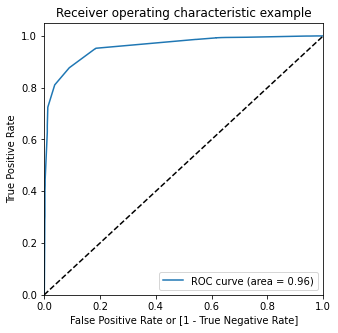

In [125]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

#### The Model has an area under curve of 0.96

In [127]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)

In [128]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380243  1.000000  0.000000
0.1   0.1  0.867115  0.952421  0.814777
0.2   0.2  0.868396  0.949895  0.818393
0.3   0.3  0.897534  0.877053  0.910101
0.4   0.4  0.904739  0.810947  0.962284
0.5   0.5  0.904739  0.810947  0.962284
0.6   0.6  0.904739  0.810947  0.962284
0.7   0.7  0.904739  0.810947  0.962284
0.8   0.8  0.887288  0.724632  0.987083
0.9   0.9  0.861351  0.653474  0.988892


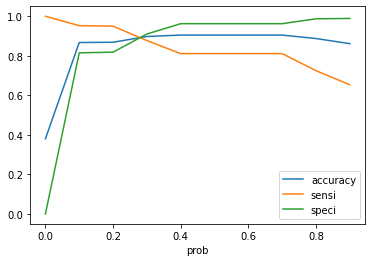

In [129]:
cutoff_df.plot.line(x='prob',y=['accuracy','sensi','speci'])
plt.show()

#### The various cutoff are plotted and 0.3 is where all values are converging. Let's re-calculate the final predicted values using 0.3 as threshold.

In [131]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead Index,predicted,Conversion_Prob%,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.967925,6676,1,96.79,1,1,1,1,1,1,1,1,1,1,1
1,1,0.995560,6138,1,99.56,1,1,1,1,1,1,1,1,1,1,1
2,1,0.882529,8650,1,88.25,1,1,1,1,1,1,1,1,1,0,1
3,0,0.080817,3423,0,8.08,1,0,0,0,0,0,0,0,0,0,0
4,0,0.080817,6552,0,8.08,1,0,0,0,0,0,0,0,0,0,0


In [132]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8975344220300993

In [133]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3523,  348],
       [ 292, 2083]], dtype=int64)

In [134]:
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]
TP=confusion[1,1]

In [135]:
# SENSITIVITY
print("Sensitivity:",round(100*(TP/float(FN+TP)),2),"%")
# SPECIFICITY
print("Specificity:",round(100*(TN/float(TN+FP)),2),"%")
# FALSE POSITIVE RATE
print("FPR:",round(100*(FP/float(FP+TN)),2),"%")
# FALSE NEGATIVE RATE
print("FNR:",round(100*(FN/float(FN+TP)),2),"%")
# positive predictive value
print("Positive Predictive Power:",round(100*(TP/float(TP+FP)),2),"%")
# negative predictive value
print("Negative Predictive Power:",round(100*(TN/float(TN+FN)),2),"%")
# ACCURACY SCORE
print("ACCURACY SCORE:",round(100*((TP+TN)/(TP+TN+FP+FN)),2),"%")

Sensitivity: 81.09 %
Specificity: 96.23 %
FPR: 3.77 %
FNR: 18.91 %
Positive Predictive Power: 92.95 %
Negative Predictive Power: 89.24 %
ACCURACY SCORE: 90.47 %


## Precision and Recall

In [136]:
print("Precision Score of the Model:",round(100*(precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)),2),"%")

Precision Score of the Model: 85.68 %


In [137]:
print("Recall Score of the Model:",round(100*(recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)),2),"%")

Recall Score of the Model: 87.71 %


In [138]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

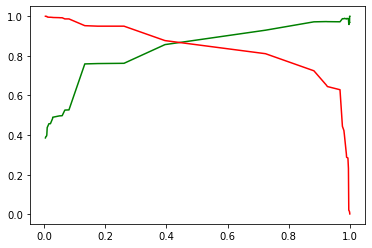

In [139]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Test data Prediction 

In [140]:
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [141]:
X_test = X_test[col]
X_test.head()

,Lead Source_Welingak Website,What is your current occupation_Unemployed,Last Activity_SMS Sent,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off
7625,0,1,0,1,0,0,0,0,0,0,0,0
5207,0,1,0,0,0,0,0,0,0,0,1,0
2390,0,1,1,0,0,0,0,0,0,0,1,0
4362,0,1,1,0,0,0,0,0,0,1,0,0
1023,0,1,0,0,0,0,1,0,0,0,0,0


In [142]:
#Adding constant
X_test_sm = sm.add_constant(X_test)

In [143]:
#Create Prediction
y_test_pred = res.predict(X_test_sm)

In [144]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [145]:
y_test_df = pd.DataFrame(y_test)

In [146]:
y_test_df['Lead Index'] = y_test_df.index

In [147]:
#removing index of both df to append them
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [148]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [149]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [150]:
#adding final predicted and conversion probability
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.4 else 0)
y_pred_final['Conversion_Prob%'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100,2))

In [151]:
y_pred_final.head()

,Converted,Lead Index,Converted_Prob,final_predicted,Conversion_Prob%
0,0,7625,0.009630,0,0.96
1,1,5207,0.967925,1,96.79
2,1,2390,0.995560,1,99.56
3,0,4362,0.058638,0,5.86
4,0,1023,0.020176,0,2.02


In [152]:
ovlAcc=metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)
print(ovlAcc)

0.9204630321135175


In [153]:
#Confusion matrix
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
print(confusion_test)

[[1629   55]
 [ 158  836]]


In [155]:
TP_test = confusion_test[1,1] 
TN_test = confusion_test[0,0] 
FP_test = confusion_test[0,1] 
FN_test = confusion_test[1,0] 

In [156]:
# SENSITIVITY
print("Sensitivity of the Test Predictions:",round(100*(TP_test/float(FN_test+TP_test)),2),"%")
# SPECIFICITY
print("Specificity of the Test Predictions:",round(100*(TN_test/float(TN_test+FP_test)),2),"%")
# ACCURACY SCORE
print("ACCURACY SCORE of the Test Data Predictions:",round(100*((TP_test+TN_test)/(TP_test+TN_test+FP_test+FN_test)),2),"%")

Sensitivity of the Test Predictions: 84.1 %
Specificity of the Test Predictions: 96.73 %
ACCURACY SCORE of the Test Data Predictions: 92.05 %


### Precision and Recall

In [157]:
print("Precision Score of the Test Data Predictions:",round(100*(precision_score(y_pred_final.Converted, y_pred_final.final_predicted)),2),"%")

Precision Score of the Test Data Predictions: 93.83 %


In [158]:
print("Recall Score of the Test Data Predictions:",round(100*(recall_score(y_pred_final.Converted, y_pred_final.final_predicted)),2),"%")

Recall Score of the Test Data Predictions: 84.1 %


In [159]:
print("Accuracy of the Test Data Predictions:",round(100*(metrics.accuracy_score(y_pred_final.Converted,y_pred_final.final_predicted)),2),"%")

Accuracy of the Test Data Predictions: 92.05 %


## Conclusion

#### Positive Predictors for HOT LEADS

A customer with these TAGS assigned is a potential Lead: "Closed by Horizzon", "Lost to EINS", "Will revert after reading the email"

A customer Lead sourced by "Welingak Website" is a Hot Lead.

A customer who is currently "Working Professional" or "Unemployed" is a Hot Lead.

When the Company has limited time and resources, it should approach Hot_leads i.e. those leads who have more than 80% of conversion chances to achieve maximum conversion & to avoid useless phone calls.